In [ ]:
#imorting neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')

<ipython-input-3-c242cc7acb8e>:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')


In [ ]:
# Display the first few rows of the dataframe
print(df.head())


   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology,

In [ ]:
# Summary statistics
print(df.describe())

          Respondent    AssessJob1    AssessJob2    AssessJob3    AssessJob4  \
count   98855.000000  66985.000000  66985.000000  66985.000000  66985.000000   
mean    50822.971635      6.397089      6.673524      5.906875      4.065791   
std     29321.650410      2.788428      2.531202      2.642734      2.541196   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%     25443.500000      4.000000      5.000000      4.000000      2.000000   
50%     50823.000000      7.000000      7.000000      6.000000      4.000000   
75%     76219.500000      9.000000      9.000000      8.000000      6.000000   
max    101592.000000     10.000000     10.000000     10.000000     10.000000   

         AssessJob5    AssessJob6    AssessJob7    AssessJob8    AssessJob9  \
count  66985.000000  66985.000000  66985.000000  66985.000000  66985.000000   
mean       3.953243      4.407196      5.673181      4.225200      7.640009   
std        2.520499      2.502069      2.9

In [ ]:
# Check for missing values
print(df.isnull().sum())

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64


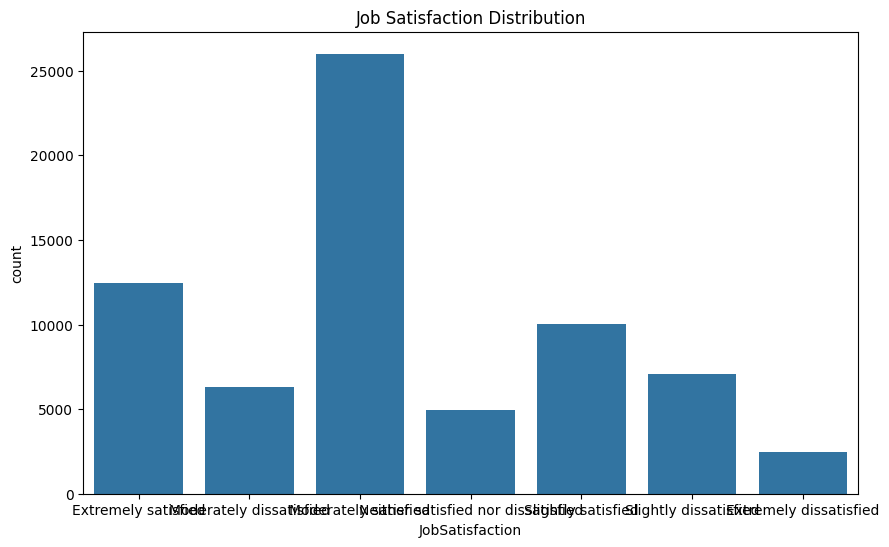

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the count plot
ax = sns.countplot(x='JobSatisfaction', data=df, palette='viridis')

# Add title and labels
plt.title('Job Satisfaction Distribution', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Select relevant features for prediction , which are relatade to job
features = ['Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation',
            'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf',
            'JobSatisfaction']

In [ ]:
# Filter the dataset with selected features
df = df[features]

In [ ]:
# Drop rows with missing target value
df = df.dropna(subset=['JobSatisfaction'])

In [ ]:
# Split features and target
X = df.drop('JobSatisfaction', axis=1)
y = df['JobSatisfaction']

In [ ]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and fit the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
import joblib

In [ ]:
# Save the model to a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Adding more libraries required
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



# Printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Printing classification report
print('Classification Report:')
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Converting classification report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# If the model is a binary classifier, plot the ROC curve
if len(set(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


Accuracy: 0.3393475750577367
Confusion Matrix:
[[   6   52    9  382    8   14   26]
 [   3  298   37 1950   28   56   87]
 [   7  113   25 1006   14   46   67]
 [  15  466   88 4182   61  118  275]
 [   6   85   19  818   26   38   51]
 [   5  104   24 1107   21   60   85]
 [  12  181   37 1548   32   53  105]]
Classification Report:
                                    precision    recall  f1-score   support

            Extremely dissatisfied       0.11      0.01      0.02       497
               Extremely satisfied       0.23      0.12      0.16      2459
           Moderately dissatisfied       0.10      0.02      0.03      1278
              Moderately satisfied       0.38      0.80      0.52      5205
Neither satisfied nor dissatisfied       0.14      0.02      0.04      1043
             Slightly dissatisfied       0.16      0.04      0.07      1406
                Slightly satisfied       0.15      0.05      0.08      1968

                          accuracy                   

In [ ]:
#Testing the Model
def predict_job_satisfaction(user_input):
    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # Ensure the input has the same columns as the training data
    input_df = input_df[X.columns]

    # Make prediction
    prediction = model.predict(input_df)

    return prediction[0]

In [ ]:
# Example user input
user_input_example = {
    'Hobby': 'Yes',
    'OpenSource': 'Yes',
    'Country': 'United States',
    'Student': 'No',
    'Employment': 'Employed full-time',
    'FormalEducation': 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'UndergradMajor': 'Computer science, computer engineering, or software engineering',
    'CompanySize': '100 to 499 employees',
    'DevType': 'Developer, back-end',
    'YearsCoding': '6-8 years',
    'YearsCodingProf': '3-5 years'
}

In [ ]:
# Predict job satisfaction for the example input
predicted_satisfaction = predict_job_satisfaction(user_input_example)
print(f'Predicted Job Satisfaction: {predicted_satisfaction}')

Predicted Job Satisfaction: Slightly satisfied
